
If we aggregate the predictions of a group of predictors (Such a classifiers or regressor)
you will often get better predictions than the best individual predictor. 
A Group of predictor is called an ensemble.
thus , this technique is called Ensemble Learning. and an Ensemble Learning algorithm is called Ensemble Method

we can train a group of Decision Tree classifier , each on a different random subset of the training set.
To make prediction , we just obtain the prediction of all individual trees , then predict the class that gets the most votes
Such an ensemble of Decision trees is called a Random Forest and d


Ensemble methods work best when the predictors are as Independent from one another as possible. One way to diverse
classifiers is to train them using very different algorithms. This increase the chance that they will make very different types of error , imporoving the ensembles accuracy

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [3]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.896


In [4]:
'''
If all classifiers are able to estimate class probabilities  then we can tell Scikit-Learn
 to predict the class with the highest class probablitiy, averaged over all the
 individual classifiers. This is called soft voting.
'''
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [5]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


'''
Bagging ant pasting
Bagging and pasting allow training instances to be sampled several times across multiple predictors,
but only bagging allow training instances to be sampled several times for the same predictor.
Once all predictor are trained , the ensemble can make a prediction for a new instance by simply aggregating the predication of all predictors
The Aggregation function is typically the statistical mode

'''

In [7]:
#The following code trains an ensemble of 500 decision Tree classifiers each trained on 100 training instance randomly sampled from the training set with replacement(this is example of bagging but if want to use pasting instead , just set bootstrap= False).
#The n_jobs parameter tells Scikit learn the number of CPU cores to use for training and prediction(-1 tells Scikit-Learn to use all available cores)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
          DecisionTreeClassifier(),n_estimators=500,
          max_samples=100,bootstrap=True, n_jobs=-1,random_state=42
          )
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [8]:
print(accuracy_score(y_test,y_pred))

0.904


In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [10]:
# Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "ensembles"
# def image_path(fig_id):
#     return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)
# def save_fig(fig_id, tight_layout=True):
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [11]:
# Common imports
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X,y, axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[2],100)
    x1, x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap,linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap,alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo",alpha=alpha)
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize = 18)
    plt.ylabel(r"$x_2$",fontsize=18,rotation=0)

/Users/bitjedi/ml/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


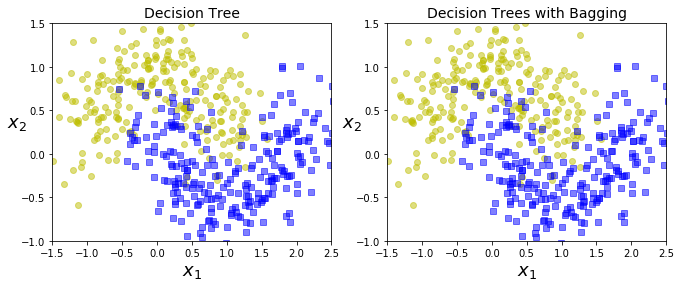

In [12]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title("Decision Tree",fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title("Decision Trees with Bagging",fontsize = 14)
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [15]:
#Using out of bag which is around 36% of data for the validation

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.89866666666666661

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.90400000000000003

In [19]:
#The oob decision function for each training instance is also available throufh the oob_decision_function_ variable.. In theis case (since the base estimator has a predict_proba() method)
#the decision function returns the class probablities for each training instance. For example , the oob evaluation estimates that the second training has 44 % probablity of belonging to the positive class.

bag_clf.oob_decision_function_

array([[ 0.37222222,  0.62777778],
       [ 0.44919786,  0.55080214],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.00571429,  0.99428571],
       [ 0.11351351,  0.88648649],
       [ 0.37837838,  0.62162162],
       [ 0.015     ,  0.985     ],
       [ 0.98369565,  0.01630435],
       [ 0.96256684,  0.03743316],
       [ 0.8       ,  0.2       ],
       [ 0.00632911,  0.99367089],
       [ 0.6984127 ,  0.3015873 ],
       [ 0.84      ,  0.16      ],
       [ 0.96391753,  0.03608247],
       [ 0.06060606,  0.93939394],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.94505495,  0.05494505],
       [ 0.9939759 ,  0.0060241 ],
       [ 0.01123596,  0.98876404],
       [ 0.33157895,  0.66842105],
       [ 0.91709845,  0.08290155],
       [ 1.        ,  0.        ],
       [ 0.98930481,  0.01069519],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,

In [20]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [23]:
#Feature Importance 
#Random Forests are very handy to get a quick understanding of what features
#actually matter,in particular if you need to perform feature selection...
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1)
rnd_clf.fit(iris["data"],iris["target"])

for name, score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.0902817936006
sepal width (cm) 0.0226031205728
petal length (cm) 0.411539982604
petal width (cm) 0.475575103223
